# Time series analysis

[Datacamp](https://campus.datacamp.com/courses/time-series-analysis-in-python).



In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats

In [2]:
stocks_and_bonds = pd.read_csv('../data/stocks_and_bonds.csv')
stocks_and_bonds.set_index('observation_date', inplace=True)
stocks_and_bonds.index = pd.to_datetime(stocks_and_bonds.index)
stocks_and_bonds.head()

,SP500,US10Y
observation_date,,
2007-06-11,1509.12,5.14
2007-06-12,1493.00,5.26
2007-06-13,1515.67,5.20
2007-06-14,1522.97,5.23
2007-06-15,1532.91,5.16


In [3]:
returns = stocks_and_bonds.pct_change()
returns.head()

,SP500,US10Y
observation_date,,
2007-06-11,NaN,NaN
2007-06-12,-0.010682,0.023346
2007-06-13,0.015184,-0.011407
2007-06-14,0.004816,0.005769
2007-06-15,0.006527,-0.013384


In [4]:
correlation = returns.corr()
print("Correlation of stocks and interest rates: ", correlation)

Correlation of stocks and interest rates:            SP500     US10Y
SP500  1.000000  0.411945
US10Y  0.411945  1.000000


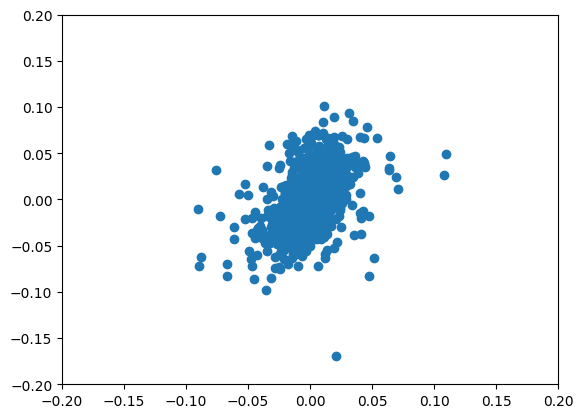

In [5]:
plt.scatter(returns['SP500'], returns['US10Y'])
plt.xlim(-0.2, 0.2)
plt.ylim(-0.2, 0.2)
plt.show()

# Linear regression

In [7]:
df = pd.read_csv('../data/regression_example_data.csv')
df.head()

,x,y
0,1.281155,-0.835129
1,-0.612631,-0.061004
2,0.933222,-0.194677
3,2.269327,-2.461142
4,-1.427691,1.040073


In [0]:
x = df['x']
y = df['y']

In [22]:
df1 = sm.add_constant(df['x'].to_frame())
mdl = sm.OLS(y, df1).fit()
print(mdl.params)
print(mdl.summary())

const   -0.005248
x       -0.907995
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     4471.
Date:                Thu, 24 Aug 2023   Prob (F-statistic):               0.00
Time:                        22:29:25   Log-Likelihood:                -560.10
No. Observations:                1000   AIC:                             1124.
Df Residuals:                     998   BIC:                             1134.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

In [17]:
np.polyfit(x, y, deg=1)

array([-0.90799455, -0.00524843])

In [27]:
mdl = stats.linregress(x, y)
print(mdl)

LinregressResult(slope=-0.9079945467703991, intercept=-0.005248433747844342, rvalue=-0.9041749130497254, pvalue=0.0, stderr=0.01357871106000873, intercept_stderr=0.013413804850284882)


# Autocorrelation

In [39]:
df = pd.read_csv('../data/stocks_and_bonds.csv')
df.set_index('observation_date', inplace=True)
df.index = pd.to_datetime(df.index)
sp500 = df['SP500']
sp500.head()

observation_date
2007-06-11    1509.12
2007-06-12    1493.00
2007-06-13    1515.67
2007-06-14    1522.97
2007-06-15    1532.91
Name: SP500, dtype: float64

In [42]:
sp500_monthly = sp500.resample(rule='M').last()
sp500_monthly = sp500_monthly.pct_change()
sp500_monthly.head()

observation_date
2007-06-30         NaN
2007-07-31   -0.031982
2007-08-31    0.012864
2007-09-30    0.035794
2007-10-31    0.014822
Freq: M, Name: SP500, dtype: float64

In [44]:
autocorrelation = sp500_monthly.autocorr()  # lag 1
autocorrelation

0.15437392286678955